<a href="https://colab.research.google.com/github/wtryab/machinelearningpathway/blob/main/rockvsmineclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir kaggle
!chmod 600 kaggle/kaggle.json
#!/bin/bash
!kaggle datasets download vijayaadithyanvg/rock-or-mine-classification

mkdir: cannot create directory ‘kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/rock-or-mine-classification
License(s): CC0-1.0
  0% 0.00/29.1k [00:00<?, ?B/s]
100% 29.1k/29.1k [00:00<00:00, 66.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "rock-or-mine-classification.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/ROCK_OR_MINE.csv', header = None)
data["Class"] = data[60]
data.drop(columns = 60, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])
#1=Rock 0=Mine

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
data.shape

(208, 61)

In [ ]:
#STATISTICAL DATA
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [ ]:
data.value_counts("Class")

,count
Class,
0,111
1,97


In [ ]:
data.groupby("Class").mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Class,,,,,,,,,,,,,,,,,,,,,
0,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
1,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
Y = data['Class']
X = data.drop(columns = 'Class', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
pr = model.predict(X_train)
train_data_accuracy = accuracy_score(pr, Y_train)
print(train_data_accuracy*100)

83.42245989304813


In [ ]:
predictedY = model.predict(X_test)
test_data_accuracy = accuracy_score(predictedY, Y_test)
print(test_data_accuracy*100)

76.19047619047619


In [ ]:
#Model Predicts from input
inputdata = (0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,0.2340,0.1764,0.2284,0.3115,0.4725,0.5543,0.5386,0.3746,0.4583,0.5961,0.7464,0.7644,0.5711,0.6257,0.6695,0.7131,0.7567,0.8077,0.8477,0.9289,0.9513,0.7995,0.4362,0.4048,0.4952,0.1712,0.3652,0.3763,0.2841,0.0427,0.5331,0.6952,0.4288,0.3063,0.5835,0.5692,0.2630,0.1196,0.0983,0.0374,0.0291,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218)

In [ ]:
#data is converted to array
inputdata_as_numpy_array = np.asarray(inputdata)
inputdata_reshaped = inputdata_as_numpy_array.reshape(1,-1)
prediction = model.predict(inputdata_reshaped)
print(prediction)

['M']


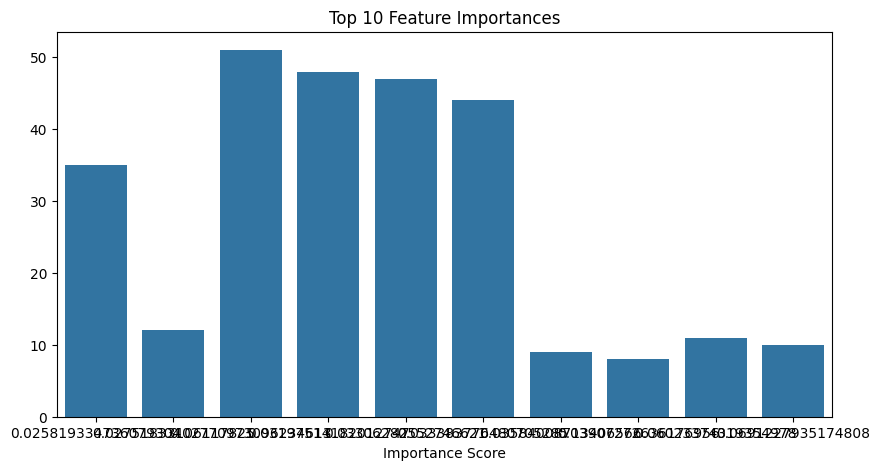

In [139]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming 'Class' is the target variable
X = data.drop(columns=["Class"])
y = data["Class"]

# Train a simple model to get feature importances
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Sort and plot feature importance
importances = model.feature_importances_
feature_names = X.columns

# Select top 10 features
top_indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[top_indices], y=[feature_names[i] for i in top_indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()
